# The Python numpy.random package

The Python numpy.random ....

- Explain the overall purpose of the package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers. 

## The Purpose of the package

The purpose of a random number generator is to generate a number or sequence of numbers that cannot be reasonably predicted better than that by random chance. 

Random number generators have applications in gambling, statistical sampling, computer simulations, cryptography and randomised experimental design.

The earliest methods of random number generators were dice, spinners, wheel of fortune, roulette, etc., cards, drawing straws, tea leaves, flipping coins, pulling from a set of items in a bag, hat, etc.

The general purpose of the numpy.random package is to generate various types and distributions of datasets that can be used in development and evaluation and used in the exploration of various libraries and analytical methods. It provides the developer with a clear understanding of the dataset prior to analysis, to explore analytical methods and derive the very variables initially used to create a dataset and deduce them again from the dataset using analyses and analytical methods and libraries. 


## Simple Random data and permutations

The sample random data functions generate sequences of random numbers without considering any criteria, like distribution. 

Permutiations acts upon a dataset in one of two fashions, it shuffles the dataset by acting upon it directly or by creating a shuffled copy of the set using the permutation function.

One practical real world use case would be that of simulating the roll of a six sided dice thousands of times as illustrated below.

In [1]:
import numpy.random as rnd
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

def diceroll ():
    import numpy.random as rnd
    dice=['one','two','three','four','five','six']
    return rnd.choice(dice)


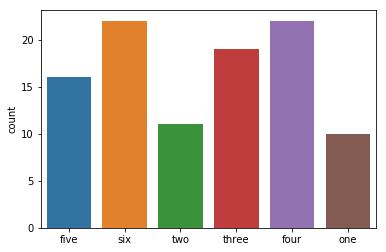

In [2]:
dicerolls=[diceroll() for i in range(100)]
sns.countplot(dicerolls)
pl.show()

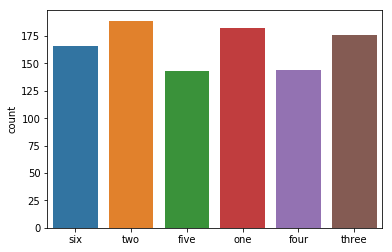

In [3]:
dicerolls=[diceroll() for i in range(1000)]
sns.countplot(dicerolls)
pl.show()

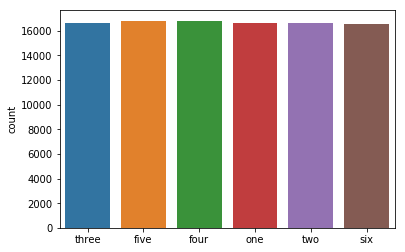

In [4]:
dicerolls=[diceroll() for i in range(100000)]
sns.countplot(dicerolls)
pl.show()

The numpy.random.choice function is used to randomy select one of the six sides of the dice and then to run this process through thousands of cycles to test the distribution for the randomness of the function.

The really interesting observation of a very simple experiment like this immediately shows the impact of the statistical sample and the corresponding differences in the distributions. With really big test samples the statistical differences becomes negledgable. 

## Permutations

Permutations can be illustarted on the dice object illustrated in the excercise above.

In [5]:
dice=['one','two','three','four','five','six']
dice

['one', 'two', 'three', 'four', 'five', 'six']

The dice object appears in the fixed sequence it was created in previously.

In [6]:
rnd.permutation(dice)

array(['six', 'four', 'two', 'one', 'three', 'five'], dtype='<U5')

In [7]:
dice

['one', 'two', 'three', 'four', 'five', 'six']

So the permutation of dice create a new permuted sequence, but the original object dice remains intact.

Now we run shuffle on the same onject dice.

In [8]:
 rnd.shuffle(dice)
 print(dice)

['six', 'three', 'two', 'four', 'one', 'five']


Now the dice object content was permanently shuffled to be in a new random order.

## The use of distributions



### Laplace
 
The Laplace distribution (given after the name of Pierre-Laplace) is a distribution which again like the t-distribution can be used for robustness to outliers due to fatter tails. It is also called double exponential distribution due to being made up from 2 exponential functions. What is interesting about it is that it is quite similar to the Gaussian. Instead of mean (μ) and standard deviation (σ), Laplace has location (also μ) and diversity (b).


### Student-t

The distinguishing feature of the t-distribution are its tails, which are fatter than the normal distribution’s. If the fat-tail anecdote isn’t a hot enough take to wow your neighbor, go to its mildly-interesting back-story concerning beer. 

Over 100 years ago, Guinness was using statistics to make better stout. There, William Sealy Gosset developed some whole new stats theory just to grow better barley. Gosset convinced the boss that the other brewers couldn’t figure out how to use the ideas, and so got permission to publish, but only under the pen name “Student”. Gosset’s best-known result is this t-distribution, which is sort of named after him. 
 
It is like the Gaussian distribution. Easy to remember - think 't'  for fatter tails; a Gaussian with fatter tails. It is a probability  distribution that is used to estimate population parameters when the  sample size is small and/or when the population variance is unknown.  Plus, it keeps outliers in mind too. Thereby, is more robust than the  Gaussian distribution. The t-distribution's properties start to resemble  the Gaussian when the degrees of freedom are high.

### Ziph
Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word the is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word of accounts for slightly over 3.5% of words (36,411 occurrences), followed by and (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.[1] 

In [16]:
import seaborn as sns
from collections import Counter as counter
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

wordlist=[]
with open('data/ulyses_by_james_joyce.txt', 'r', encoding='utf-8') as infile:
    for line in infile:
        words=line.strip().split()
        for word in words:
            wordlist.append(word.casefold().strip('[,:.]'))

wordcount=counter(wordlist)

top30=wordcount.most_common(20)
idxs=[]
words=[]
counts=[]

idx=0
for word,count in top30:
    words.append(word)
    counts.append(count)
    idx+=1
    idxs.append(idx)
    #print("{}.\t{}\t{}".format(idx,word,count))
pl_size = (18, 4)
df=pd.DataFrame({'idx': idxs,'words': words,'counts': counts})
df

,idx,words,counts
0,1,the,14888
1,2,of,8244
2,3,and,7198
3,4,a,6442
4,5,to,4983
5,6,in,4887
6,7,he,3752
7,8,his,3292
8,9,i,2527
9,10,that,2523


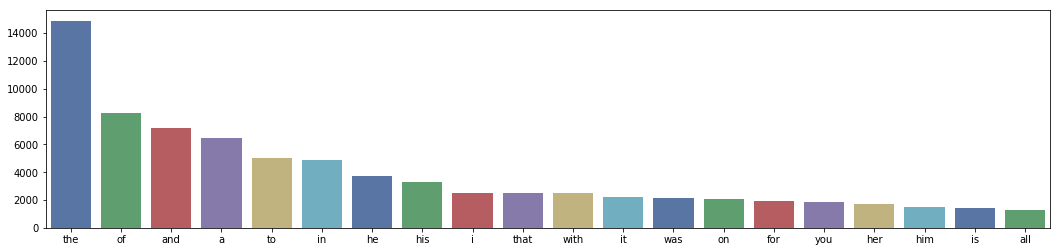

In [17]:
fig, ax = pl.subplots(figsize=pl_size)
sns.barplot(ax=ax,x=words,y=counts, palette="deep")
pl.show()

## References

1. __[Numpy reference manual - numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)__
1. __[Cosmo Learning Video - Lecture 18 - Python Random Numbers](https://cosmolearning.org/video-lectures/python-random-number-generator-random-module/)__
1. __[rando.Random vs numpy.Random](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)__
1. __[Quora - The most interesting probability distributions](https://www.quora.com/What-are-some-of-the-most-interesting-probability-distributions)__
1. __[HDIP Probabbility Distributions Summary](http://hdip-data-analytics.com/statistics/distributions)__
1. __[Common Probability Distributions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)__
1. __[Random Number Generators - University Libraries - Ball State University](lib.bsu.edu/beneficencepress/mathexchange/09-01/randomnumbergenerators.pdf)__
1. __[R. Davies, Hardware random number generators](http://www.robertnz.net/hwrng.htm)__
1. __[A Brief History of Random Numbers](https://medium.freecodecamp.org/a-brief-history-of-random-numbers-9498737f5b6c)__
1. __[]()__
1. __[]()__
1. __[]()__
1. __[]()__